In [35]:
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, auc, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,cross_val_score
from scipy.stats import uniform, randint
import seaborn as sns

In [2]:
def load_data(dir_path):
    categories = ['NORMAL', 'PNEUMONIA']
    X = []  # input array
    y = []  # output array
    for category in categories:
        print(f'Loading category: {category}')
        category_path = os.path.join(dir_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img_array = imread(img_path)
            img_resized = resize(img_array, (100, 100, 3))
            X.append(img_resized.flatten() / 255)
            y.append(categories.index(category))
        print(f'Loaded category: {category} successfully')
    print("Data loading completed!")
    return X, y


In [3]:
train_path='../input/chest-xray-pneumonia/chest_xray/train' 
test_path='../input/chest-xray-pneumonia/chest_xray/test'


In [4]:

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)


Loading category: NORMAL
Loaded category: NORMAL successfully
Loading category: PNEUMONIA
Loaded category: PNEUMONIA successfully
Data loading completed!
Loading category: NORMAL
Loaded category: NORMAL successfully
Loading category: PNEUMONIA
Loaded category: PNEUMONIA successfully
Data loading completed!


In [5]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

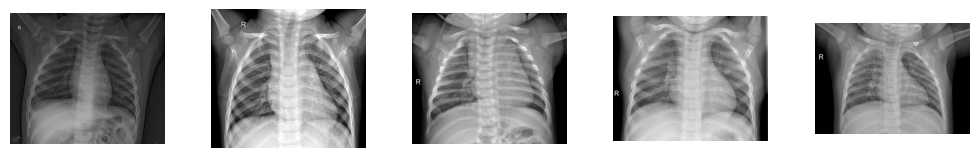

In [6]:
plot_images(train_path+'/NORMAL')

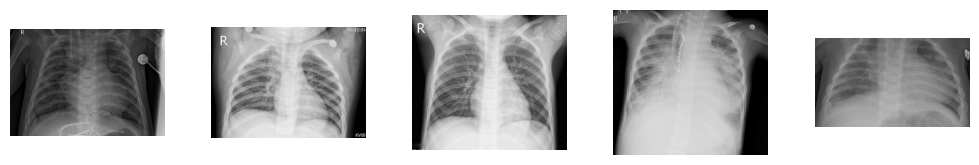

In [7]:
plot_images(train_path+'/PNEUMONIA')

In [8]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  plt.show()

{'PNEUMONIA': 3875, 'NORMAL': 1341}


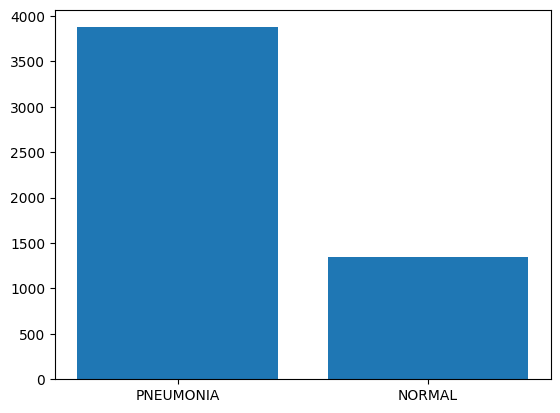

In [9]:
plot_bar_chart_diagram(train_path)

{'PNEUMONIA': 390, 'NORMAL': 234}


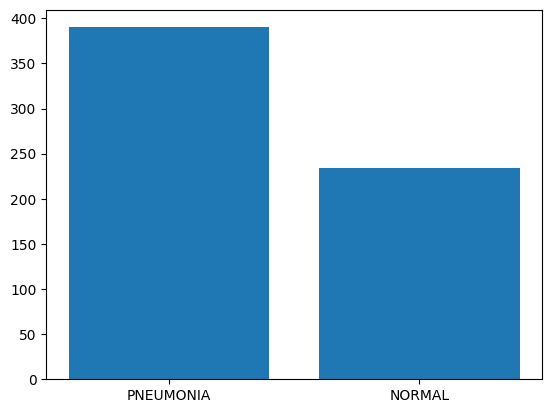

In [10]:
plot_bar_chart_diagram(test_path)

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X_train)

In [19]:
explained_variance=pca.explained_variance_ratio_
len(explained_variance[explained_variance>0.0001])

356

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=356)
X_train=pca.fit_transform(X_train)

In [21]:
X_test=pca.transform(X_test)

In [22]:

clf_svm = SVC(C=0.1, kernel='rbf')
clf_svm.fit(X_train, y_train)
clf_svm_scores = cross_val_score(clf_svm, X_train, y_train, cv=3, scoring='accuracy')

In [23]:
lgr = LogisticRegression(solver='liblinear', C=1)
lgr.fit(X_train, y_train)
lgr_scores = cross_val_score(lgr,X_train, y_train, cv=3, scoring='accuracy')

In [24]:

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3, scoring='accuracy')

In [25]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_scores = cross_val_score(nb, X_train, y_train, cv=3, scoring='accuracy')

In [26]:
print(f"SVM accuracy: {clf_svm_scores.mean():.2f} +/- {clf_svm_scores.std():.2f}")
print(f"Logistic Regression accuracy: {lgr_scores.mean():.2f} +/- {lgr_scores.std():.2f}")
print(f"Naive Bayes accuracy: {nb_scores.mean():.2f} +/- {nb_scores.std():.2f}")
print(f"Decision Tree accuracy: {dt_scores.mean():.2f} +/- {dt_scores.std():.2f}")

SVM accuracy: 0.94 +/- 0.00
Logistic Regression accuracy: 0.76 +/- 0.00
Naive Bayes accuracy: 0.77 +/- 0.01
Decision Tree accuracy: 0.87 +/- 0.01


In [28]:
print("\nClassification Report on Train Set:")
print("SVM:\n", classification_report(y_train, clf_svm.predict(X_train)))
print("Logistic Regression:\n", classification_report(y_train, lgr.predict(X_train)))
print("Naive Bayes:\n", classification_report(y_train, nb.predict(X_train)))
print("Decision Tree\n", classification_report(y_train, dt.predict(X_train)))


Classification Report on Train Set:
SVM:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1341
           1       0.95      0.99      0.97      3875

    accuracy                           0.95      5216
   macro avg       0.96      0.93      0.94      5216
weighted avg       0.95      0.95      0.95      5216

Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.20      0.34      1341
           1       0.78      1.00      0.88      3875

    accuracy                           0.79      5216
   macro avg       0.89      0.60      0.61      5216
weighted avg       0.84      0.79      0.74      5216

Naive Bayes:
               precision    recall  f1-score   support

           0       0.55      0.74      0.63      1341
           1       0.90      0.79      0.84      3875

    accuracy                           0.78      5216
   macro avg       0.72      0.76      0.73      

In [29]:

# Evaluate models on test set
print("\nClassification Report on Test Set:")
print("SVM:\n", classification_report(y_test, clf_svm.predict(X_test)))
print("Logistic Regression:\n", classification_report(y_test, lgr.predict(X_test)))
print("Naive Bayes:\n", classification_report(y_test, nb.predict(X_test)))
print("Decision Tree\n", classification_report(y_test, dt.predict(X_test)))




Classification Report on Test Set:
SVM:
               precision    recall  f1-score   support

           0       0.93      0.34      0.50       234
           1       0.71      0.98      0.83       390

    accuracy                           0.74       624
   macro avg       0.82      0.66      0.66       624
weighted avg       0.79      0.74      0.70       624

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.03      0.05       234
           1       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.82      0.51      0.41       624
weighted avg       0.77      0.63      0.50       624

Naive Bayes:
               precision    recall  f1-score   support

           0       0.70      0.58      0.63       234
           1       0.77      0.85      0.81       390

    accuracy                           0.75       624
   macro avg       0.73      0.71      0.72       

Confusion Matrices:


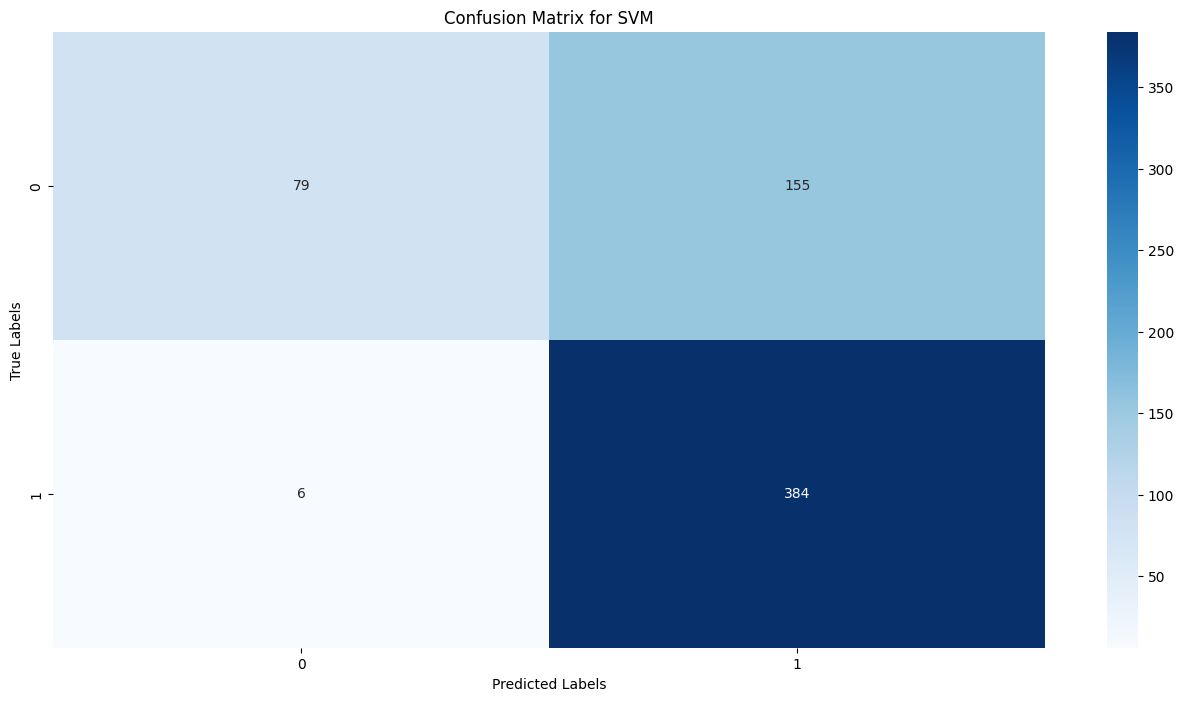

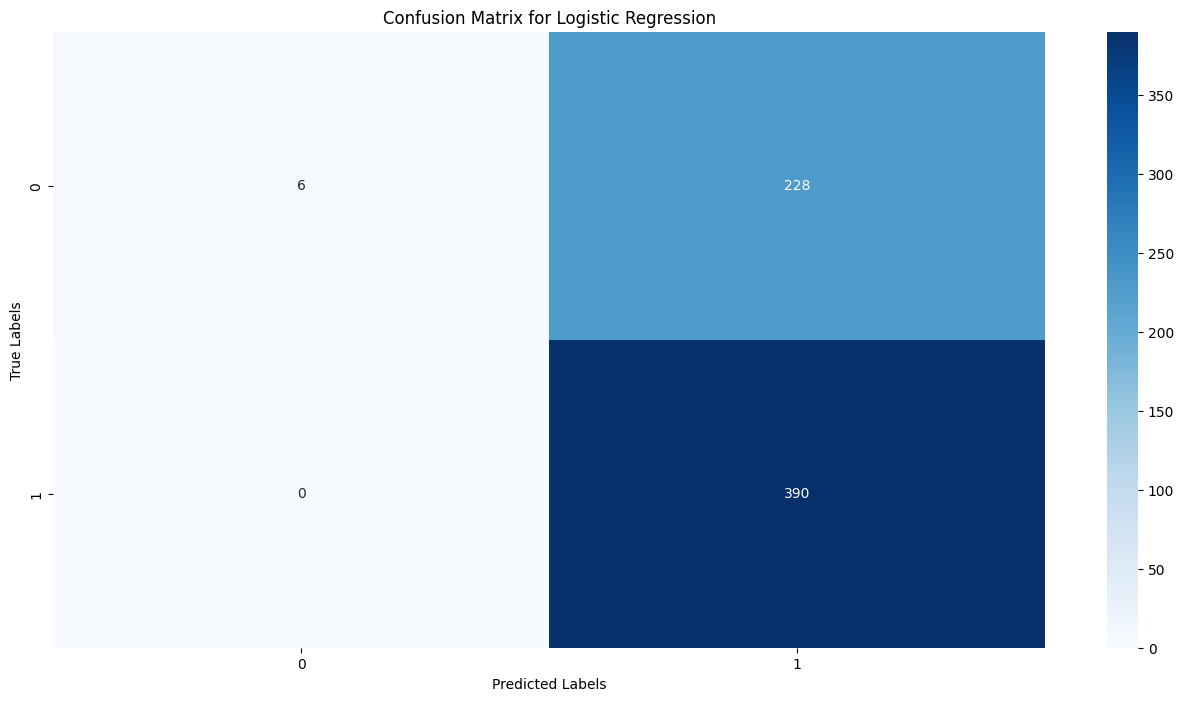

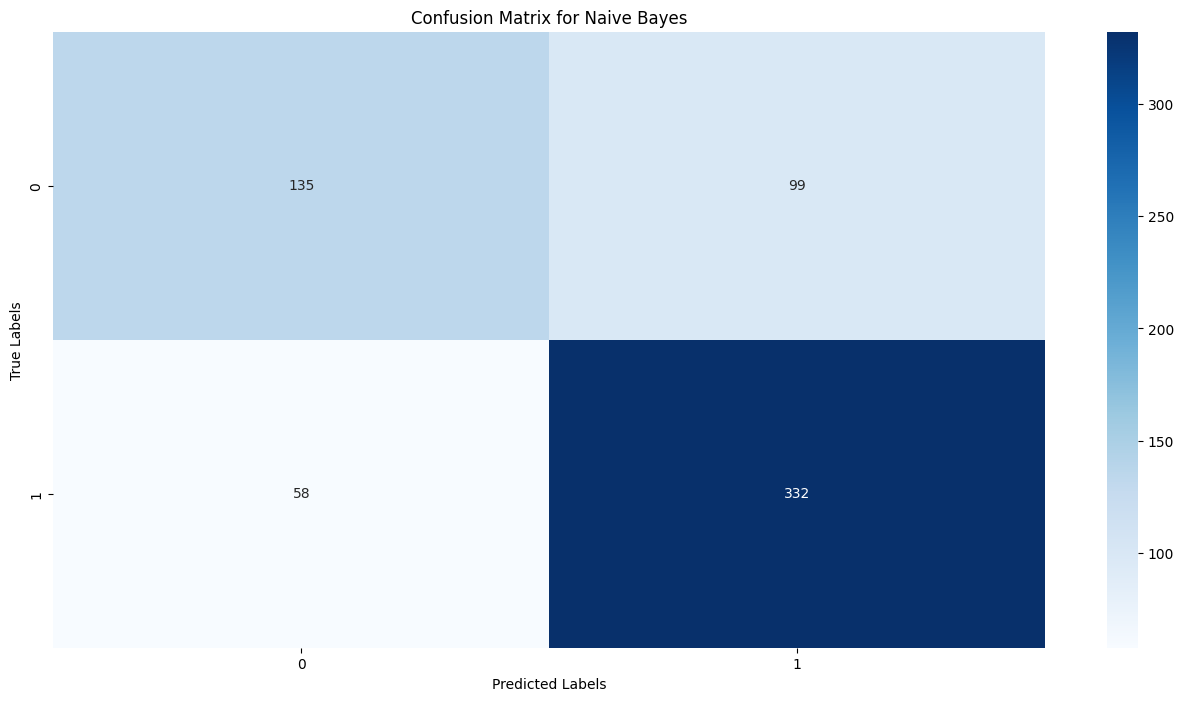

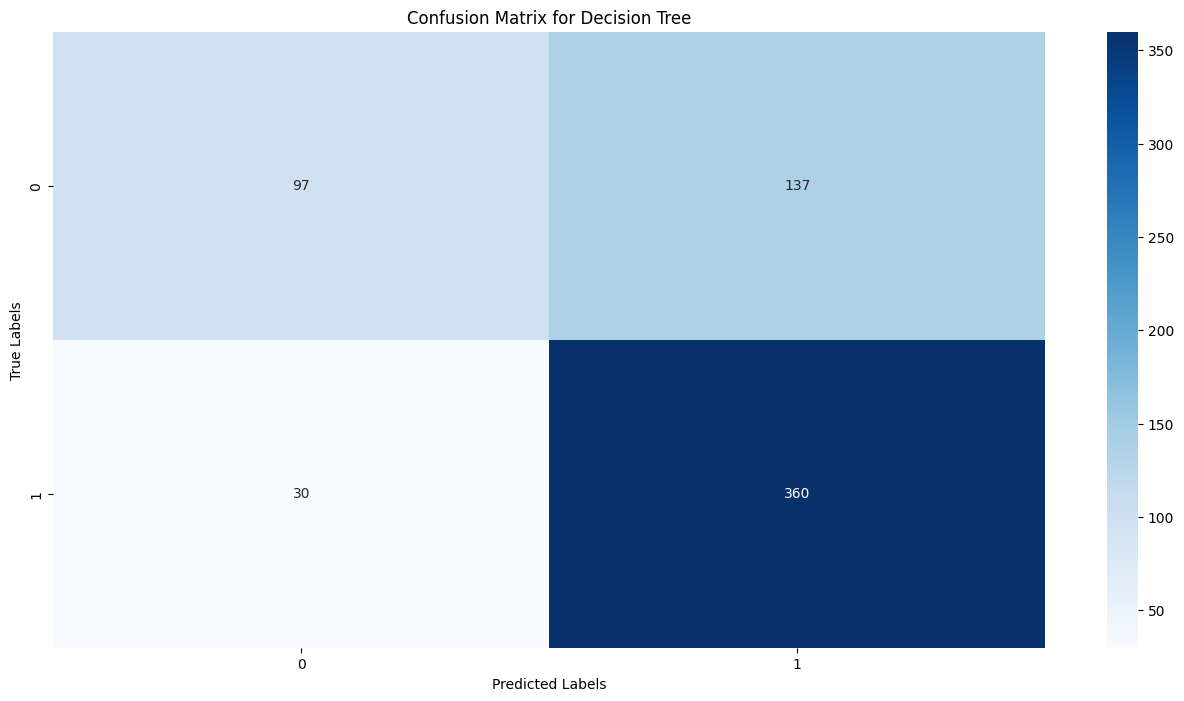

In [37]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(16, 8))
  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
print("Confusion Matrices:")
# Khởi tạo các mô hình và huấn luyện trên tập huấn luyện
clf_svm.fit(X_train, y_train)
lgr.fit(X_train, y_train)
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)

plot_confusion_matrix(y_test, clf_svm.predict(X_test), "SVM")
plot_confusion_matrix(y_test, lgr.predict(X_test), "Logistic Regression")
plot_confusion_matrix(y_test, nb.predict(X_test), "Naive Bayes")
plot_confusion_matrix(y_test, dt.predict(X_test), "Decision Tree")


ROC Curves:


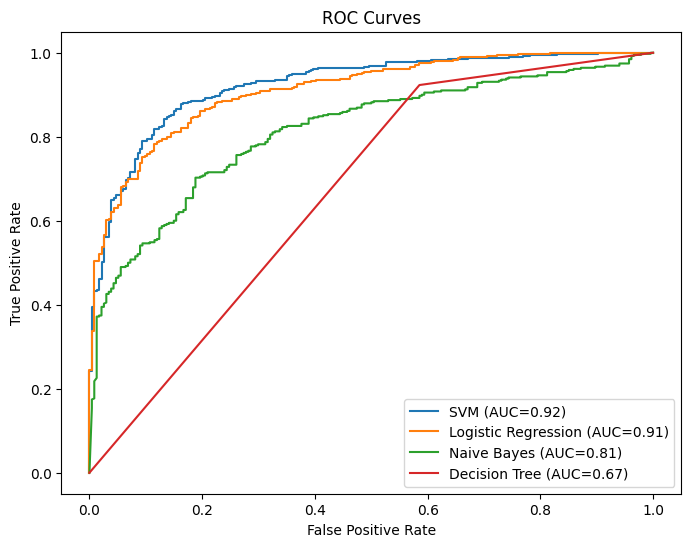

In [38]:
def plot_roc_curves(y_true, y_scores, labels):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    for y_score, label in zip(y_scores, labels):
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        ax.plot(fpr, tpr, label=f"{label} (AUC={auc_score:.2f})")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curves")
    ax.legend(loc="best")
    plt.show()

# Plot ROC curves
print("\nROC Curves:")
plot_roc_curves(y_test, [clf_svm.decision_function(X_test),
                         lgr.predict_proba(X_test)[:, 1],
                         nb.predict_proba(X_test)[:, 1],
                         dt.predict_proba(X_test)[:, 1]],
                ["SVM", "Logistic Regression", "Naive Bayes", "Decision Tree"])

In [39]:
# Evaluate models on test set
print("\nAccuracy on Test Set:")
print(f"SVM: {accuracy_score(y_test, clf_svm.predict(X_test)):.2f}")
print(f"Logistic Regression: {accuracy_score(y_test, lgr.predict(X_test)):.2f}")
print(f"Naive Bayes: {accuracy_score(y_test, nb.predict(X_test)):.2f}")
print(f"Decision Tree: {accuracy_score(y_test, dt.predict(X_test)):.2f}")



Accuracy on Test Set:
SVM: 0.74
Logistic Regression: 0.63
Naive Bayes: 0.75
Decision Tree: 0.73


In [40]:
# Tối ưu hóa SVM với GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
print(f"SVM best parameters: {grid_search_svm.best_params_}")
print(f"SVM best score: {grid_search_svm.best_score_:.2f}")

# Tối ưu hóa Logistic Regression với RandomizedSearchCV
param_distributions = {'C': uniform(0.1, 10), 'solver': ['liblinear', 'saga']}
random_search_lgr = RandomizedSearchCV(LogisticRegression(), param_distributions, cv=3, n_iter=5, scoring='accuracy', n_jobs=-1)
random_search_lgr.fit(X_train, y_train)
print(f"Logistic Regression best parameters: {random_search_lgr.best_params_}")
print(f"Logistic Regression best score: {random_search_lgr.best_score_:.2f}")

# Tối ưu hóa Decision Tree với RandomizedSearchCV
param_distributions = {'max_depth': randint(1, 10),
                      'min_samples_split': randint(2, 6)}
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), 
                                     param_distributions, cv=3, n_iter=5, scoring='accuracy', n_jobs=-1)
random_search_dt.fit(X_train, y_train)
print(f"Decision Tree best parameters: {random_search_dt.best_params_}")
print(f"Decision Tree best score: {random_search_dt.best_score_:.2f}")
 #Tối ưu hóa Naive Bayes với RandomizedSearchCV
param_distributions = {'var_smoothing': uniform(1e-10, 1e-5)}
random_search_nb = RandomizedSearchCV(GaussianNB(), param_distributions, cv=3, n_iter=10, scoring='accuracy', n_jobs=-1)
random_search_nb.fit(X_train, y_train)
print(f"Naive Bayes best parameters: {random_search_nb.best_params_}")
print(f"Naive Bayes best score: {random_search_nb.best_score_:.2f}")

SVM best parameters: {'C': 10, 'kernel': 'rbf'}
SVM best score: 0.97
Logistic Regression best parameters: {'C': 9.903542024841855, 'solver': 'saga'}
Logistic Regression best score: 0.92
Decision Tree best parameters: {'max_depth': 5, 'min_samples_split': 4}
Decision Tree best score: 0.89
Naive Bayes best parameters: {'var_smoothing': 8.429458639134936e-06}
Naive Bayes best score: 0.78


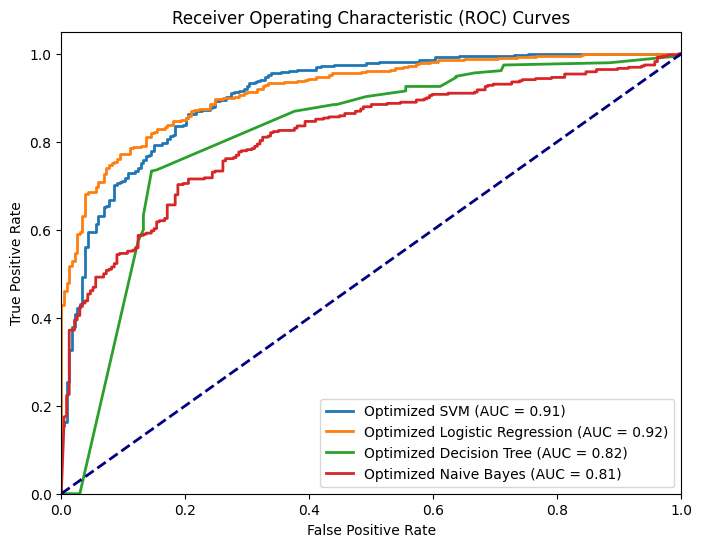

In [43]:
# Khởi tạo các mô hình với tham số tối ưu
best_svm = SVC(C=10, kernel='rbf')
best_svm.fit(X_train, y_train)

best_lgr = LogisticRegression(C=9.903542024841855, solver='saga')
best_lgr.fit(X_train, y_train)

best_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=4)
best_dt.fit(X_train, y_train)

best_nb = GaussianNB(var_smoothing=8.429458639134936e-06)
best_nb.fit(X_train, y_train)

# Tạo danh sách các mô hình
models = [("Optimized SVM", best_svm), ("Optimized Logistic Regression", best_lgr),
          ("Optimized Decision Tree", best_dt), ("Optimized Naive Bayes", best_nb)]

# Vẽ đường cong ROC cho từng mô hình
plt.figure(figsize=(8, 6))
for model_name, model in models:
    y_scores = model.decision_function(X_test) if hasattr(model, 'decision_function') else model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

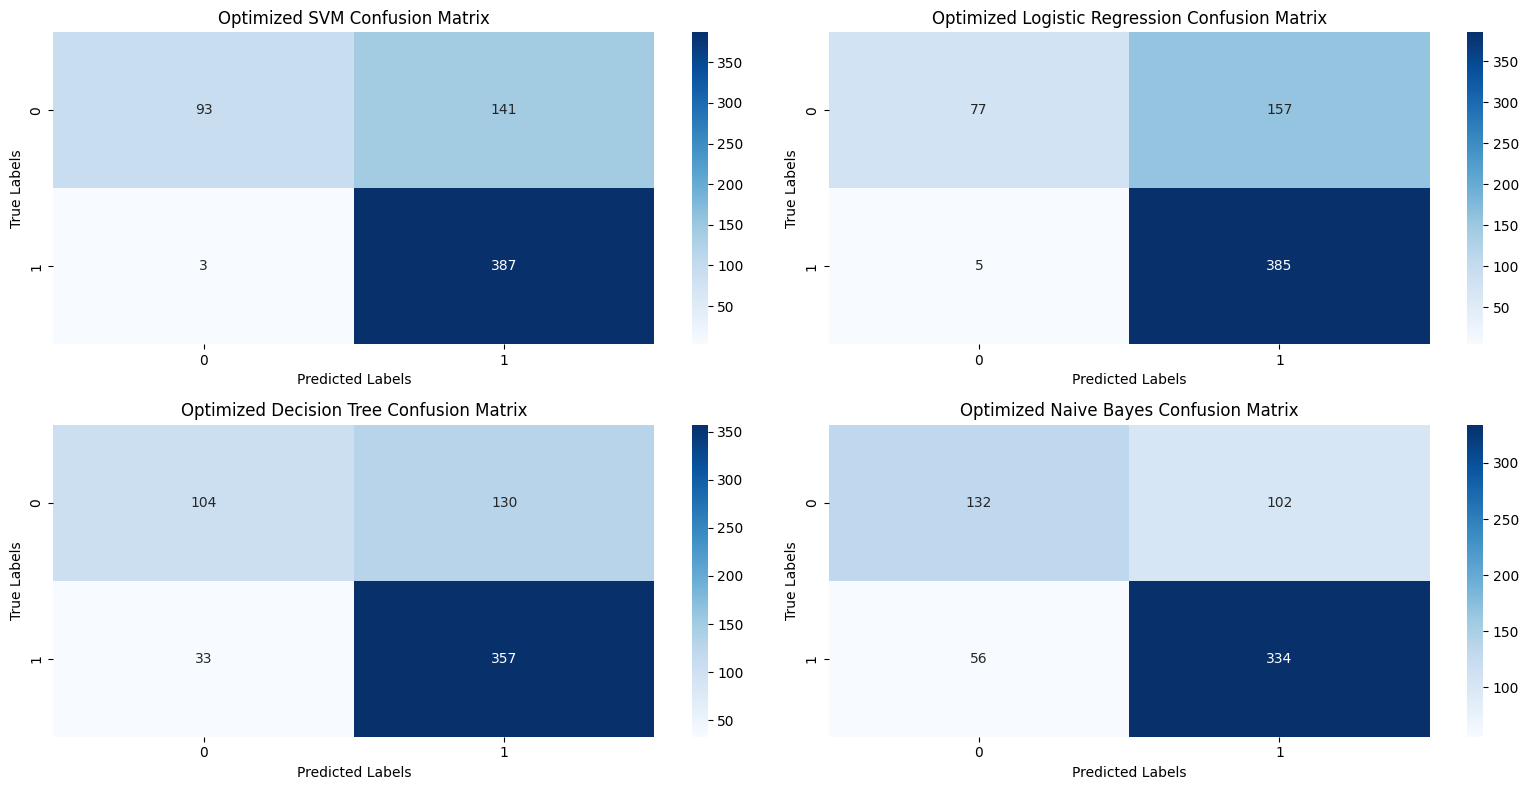

In [44]:
import seaborn as sns
plt.figure(figsize=(16, 8))
for idx, (model_name, model) in enumerate(models, start=1):
    plt.subplot(2, 2, idx)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

plt.tight_layout()
plt.show()